# Data Analysis in Python

## Certification Project 3: Medical Data Visualizer

### from [FreeCodeCamp.org](https://www.freecodecamp.org)


### [Click here for an Overview of Project Requirements](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer)


In [ ]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


## Project Exercises:


In [13]:
# *** Function to import and normalize data, as well as calculate the "overweight" column.
# *** I extracted this to a function to avoid remapping values more than once when working on the exercises,
# *** which usually happened by running notebook cells out of order.
def prepare_df():
    df = pd.read_csv('medical_examination.csv')
    # Add 'overweight' column
    # *** Weight in kg / (height in meters)^2
    # *** >25 is overweight
    # *** map the resulting boolean series to 0s and 1s as per project instructions
    df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).map({True: 1, False: 0})

    # Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
    df['cholesterol'] = df['cholesterol'].map({0: 0, 1: 0, 2: 1, 3: 1})
    df['gluc'] = df['gluc'].map({1: 0, 2: 1, 3: 1})
    return df

### Function for drawing a Seaborn catplot of the data:

In [24]:
# Draw Categorical Plot
def draw_cat_plot():
    df = prepare_df()
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'
    # *** You want to melt it by 'cardio' as well to accomplish the next step.
    df_cat = pd.melt(df.filter(['cholesterol', 'gluc', 'alco', 'active', 'overweight', 'cardio']), id_vars=['cardio'])
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # *** The direction in the comment directly above is vague and misleading:
    # *** you have to rename one of the columns merely to meet the close-to-arbitrary exercise requirements... 
    # *** ...rather than "for the catplot to work correctly."
    df_cat = df_cat.value_counts(sort=False).to_frame().reset_index()
    df_cat.rename(columns={0: 'total'}, inplace=True)
    
    # Draw the catplot with 'sns.catplot()'
    sns.catplot(df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')

    # Get the figure for the output
    fig = plt.figure()


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

### Function for drawing a Seaborn heatmap of the data:

In [26]:
# Draw Heat Map
def draw_heat_map():
    df = prepare_df()
    # Clean the data
    # *** only use data where ap-lo <= ap-hi
    # *** trim the outliers from height and weight (below the 2.5 percentile or above 97.5 percentile)
    # *** this was required only for this particular function, but I would probably extract it to its own function
    # *** when working with data in the real world as not to pollute the original data frame.
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) 
    & (df['height'] >= df['height'].quantile(0.025)) 
    & (df['height'] <= df['height'].quantile(0.975)) 
    & (df['weight'] >= df['weight'].quantile(0.025)) 
    & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = mask = np.triu(np.ones_like(corr, dtype=bool))
    corr.mask(mask, inplace=True)

    # Set up the matplotlib figure
    fig, ax = plt.subplots()
    sns.heatmap(corr, annot=True, fmt=".1f", ax = ax)
    ax.set_title("Cardiovascular Disease Risk - Correlation Heatmap")
    
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

### Presentation of the figures drawn by the above two functions:

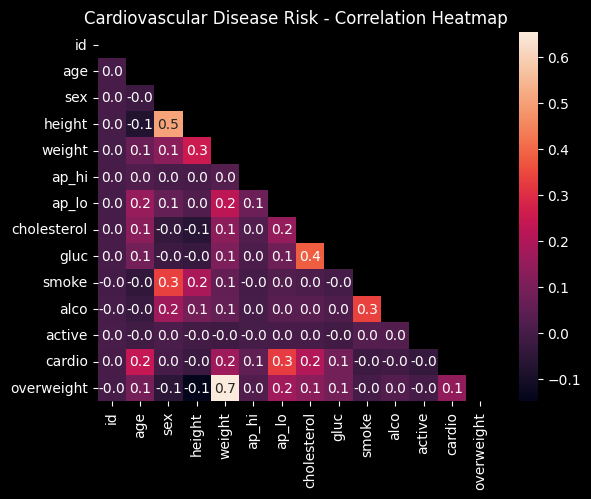

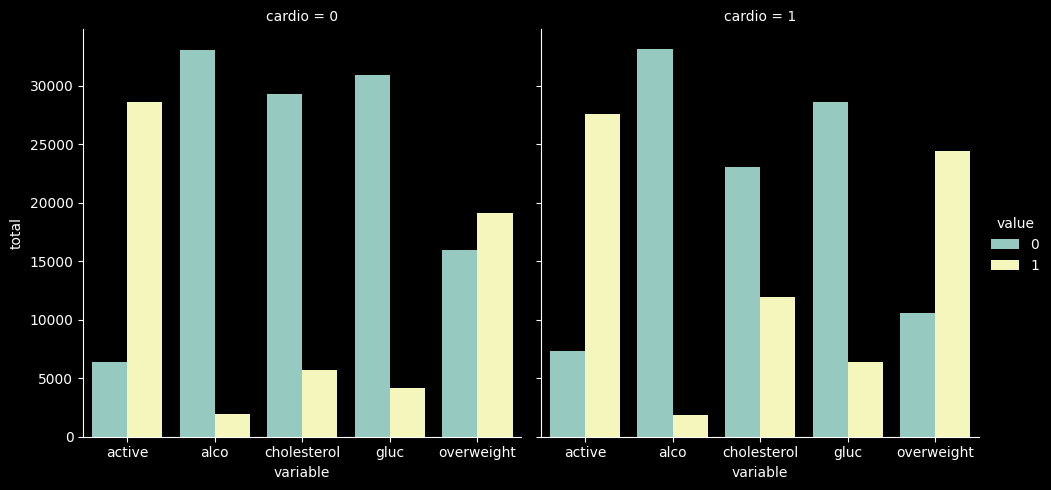

<Figure size 640x480 with 0 Axes>

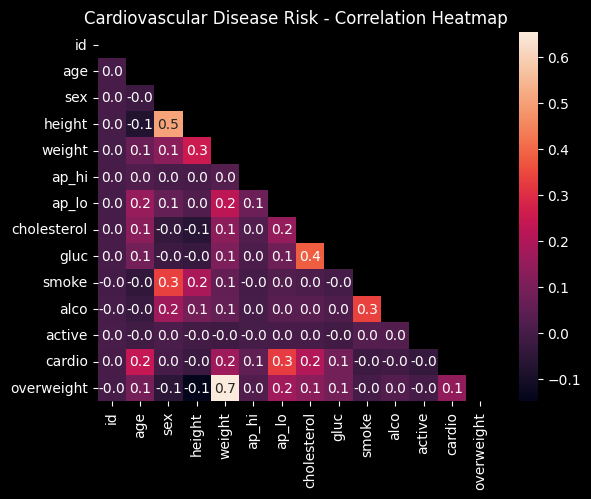

In [27]:
draw_cat_plot()
draw_heat_map()